# Web of Science

## Overview

In [46]:
cypher = """
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return count(distinct w1) as works_cited,
    count(distinct r2) as num_citations,
    count(distinct w2) as citing_works,
    count(distinct a2) as citing_authors
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-wos")
graph.run(cypher).data()

[{'works_cited': 33,
  'num_citations': 34,
  'citing_works': 25,
  'citing_authors': 37}]

## Cited works

In [47]:
cypher = """
use `ehrlich-wos`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return distinct a1.display_name as author, w1.year as year, w1.title as title order by w1.year
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-wos")
graph.run(cypher).to_data_frame()

author  year                                              title
0   ehrlich, eugen  1893                                           no_title
1   ehrlich, eugen  1906                            die freie rechtsfindung
2   ehrlich, eugen  1913                                           no_title
3   ehrlich, eugen  1914         professor ehrlich's seminary of living law
4   ehrlich, eugen  1916         montesquieu and sociological jurisprudence
5   ehrlich, eugen  1916                     das recht und die gesellschaft
6   ehrlich, eugen  1917  judicial freedom of decision: its principles a...
7   ehrlich, eugen  1921  judicial freedom of decision: principles and o...
8   ehrlich, eugen  1922                               the sociology of law
9   ehrlich, eugen  1929                                           no_title
10  ehrlich, eugen  1936     fundamental principles of the sociology of law
11  ehrlich, eugen  1936                                           no_title
12  ehrlich, eugen  1962                            study of the living law
13  ehrlich, eugen  1962                                           no_title
14  ehrlich, eugen  1967                                           no_title
15  ehrlich, eugen  1972                                           no_title
16  ehrlich, eugen  1973                                           no_title
17  ehrlich, eugen  1989                                           no_title
18  ehrlich, eugen  1989              grundlegung der soziologie des rechts
19  ehrlich, eugen  1992                                       entgegnungen
20  ehrlich, eugen  2001                                           no_title
21  ehrlich, eugen  2002                                           no_title
22  ehrlich, eugen  2009                                           no_title

## Citing works

In [48]:
cypher = """
use `ehrlich-wos`
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen"
WITH w2, COLLECT(a2)[0] AS first_author
RETURN first_author.display_name AS author, w2.year AS year, w2.title AS title
ORDER BY w2.year
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-wos")
graph.run(cypher).to_data_frame()

author  year  \
0               tamanaha, bz  2011   
1          krieger, linda h.  2011   
2           wilder, colin f.  2012   
3        trajkovic, marko s.  2012   
4           kuenzler, adrian  2012   
5         tamanaha, brian z.  2013   
6        martin, kimberly h.  2013   
7              exner, gudrun  2013   
8            maurer, andreas  2013   
9            zumbansen, peer  2013   
10        humfress, caroline  2013   
11    lakhani, sarah morando  2014   
12        timmermans, stefan  2014   
13          antonov, mikhail  2015   
14       gilbert, michael d.  2015   
15            croce, mariano  2017   
16             ubink, janine  2017   
17         dagbanja, dominic  2018   
18         sullivan, sean p.  2019   
19            seidel, katrin  2019   
20      korycka-zirk, milena  2020   
21   gruber, malte-christian  2020   
22  fischer-lescano, andreas  2020   
23            doyle, matthew  2021   
24   fillafer, franz leander  2022   

                                                title  
0   a vision of social-legal change: rescuing ehrl...  
1   when organizations rule: judicial deference to...  
2   teaching old dogs new tricks: four motifs of l...  
3                    the realistic concept of the law  
4   judicial legitimacy and the role of courts: ex...  
5   law's history: american legal thought and the ...  
6   social organization, collective sentiment, and...  
7   the "soziologische gesellschaft in wien" [soci...  
8   the concept of participation in the making of ...  
9   law and legal pluralism: hybridity in transnat...  
10  thinking through legal pluralism: 'forum shopp...  
11  from problems of living to problems of law: th...  
12  biopolitical citizenship in the immigration ad...  
13  the realist and rhetorical dimensions of the p...  
14                                    insincere rules  
15  the enemy as the unthinkable: a concretist rea...  
16  courting custom: regulating access to justice ...  
17  legal pluralism? indigenous rights as legal co...  
18                                 insincere evidence  
19  constitutional recognition of islamic family l...  
20  wieslaw lang's legal thought - between sociolo...  
21                              why non-human rights?  
22  nature as a legal person: proxy constellations...  
23  the case of piruani: contested justice, legal ...  
24  imperial diversity, fractured sovereignty, and...

# OpenAlex

openalex.org -> neo4j

## Overview

In [49]:
cypher = """
use `ehrlich-openalex`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return count(distinct w1) as works_cited,
    count(distinct r2) as num_citations,
    count(distinct w2) as citing_works,
    count(distinct a2) as citing_authors
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(cypher).data()

[{'works_cited': 18,
  'num_citations': 402,
  'citing_works': 355,
  'citing_authors': 394}]

## Cited works
### All years

In [50]:
query = """
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
match (w1)-[r4:PUBLISHED_IN]->(v1:Venue)
where a1.display_name = "ehrlich, eugen"
return distinct
    a1.display_name as author,
    w1.year as year,
    w1.title as title,
    v1.name as container,
    count(r2) as citations
order by citations desc
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_data_frame()

author  year                                              title  \
0   ehrlich, eugen  1989             grundlegung der soziologie des rechts.   
1   ehrlich, eugen  1938     fundamental principles of the sociology of law   
2   ehrlich, eugen  1922                               the sociology of law   
3   ehrlich, eugen  1937     fundamental principles of the sociology of law   
4   ehrlich, eugen  1916         montesquieu and sociological jurisprudence   
5   ehrlich, eugen  1986                          gesetz und lebendes recht   
6   ehrlich, eugen  1967                                    recht und leben   
7   ehrlich, eugen  1992  hans kelsen und die rechtssoziologie : auseina...   
8   ehrlich, eugen  1913                              soziologie des rechts   
9   ehrlich, eugen  2003  rechtssoziologie und rechtswissenschaft : eine...   
10  ehrlich, eugen  1925                              die juristische logik   
11  ehrlich, eugen  1937    fundamental principles of the sociology of law.   
12  ehrlich, eugen  1967  recht und leben : gesammelte schriften zur rec...   
13  ehrlich, eugen  1916  die aufgaben der sozialpolitik im österreichis...   
14  ehrlich, eugen  1986  gesetz und lebendes recht : vermischte kleiner...   
15  ehrlich, eugen  1893              die stillschweigende willenserklärung   

                                container  citations  
0   american journal of international law        145  
1        university of chicago law review        138  
2                      harvard law review        118  
3                        routledge ebooks         45  
4                      harvard law review         39  
5                duncker & humblot ebooks         13  
6                duncker & humblot ebooks         10  
7                  scientia verlag ebooks          5  
8                             veit ebooks          4  
9                            nomos ebooks          3  
10                     j.c.b. mohr ebooks          3  
11           american sociological review          2  
12               duncker & humblot ebooks          1  
13               duncker & humblot ebooks          1  
14               duncker & humblot ebooks          1  
15                      c. heymann ebooks          1

### Cited works (1960-1989)

In [51]:
query = """
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen" and w2.year >= 1960 and w2.year <= 1990
return distinct
    a1.display_name as author,
    w1.year as year,
    w1.title as title,
    count(r2) as citations
order by citations desc
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_data_frame()

author  year                                           title  \
0  ehrlich, eugen  1922                            the sociology of law   
1  ehrlich, eugen  1938  fundamental principles of the sociology of law   
2  ehrlich, eugen  1989          grundlegung der soziologie des rechts.   

   citations  
0         20  
1         16  
2          6

### Graph: Cited works, over time (Abb. 19)

OpenAlex seems not to distinguish between different editions of a work - e.g. ehrlich (1989) is cited even before publication. Also, book reviews are included (like the one by timasheff).

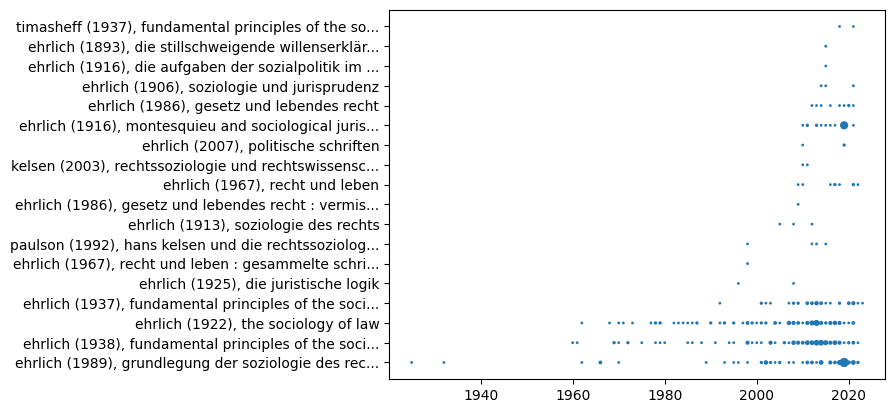

In [2]:
query = """
MATCH (citingWork:Work)-[r:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author)
WHERE citedAuthor.display_name = "ehrlich, eugen"
RETURN citedWork.display_name as work, citingWork.year as year, count(*) as citations
ORDER BY year
"""
from scripts.n4j_plotlib import plot_year_citations
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
data = graph.run(query).data()
plot_year_citations(data, dep_col='work', file="docs/18-openalex-ehrlich-cited-works-timeseries.png")

### Percentage of cited works that were published before 1967

In [53]:
query = """
MATCH (citingWork:Work)-[r:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author)
WHERE citedAuthor.display_name = "ehrlich, eugen"
WITH COUNT(citedWork) AS totalWorks

MATCH (citingWork:Work)-[r:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author)
WHERE citedAuthor.display_name = "ehrlich, eugen" AND citedWork.year < 1967
WITH COUNT(citedWork) AS before1967Works, totalWorks

RETURN (toFloat(before1967Works) / totalWorks) * 100 AS percentage
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_table()


percentage 
------------------
 69.1747572815534

## Citing works
### Citing works (1960-1989)

In [54]:
cypher = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1967 and w2.year < 1990
WITH w1, w2, COLLECT(a2)[0] AS first_author
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    w1.title as cited_work
ORDER BY w2.year
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(cypher).to_data_frame()

author  year  \
0            kulcsár, kálmán  1968   
1          hahm, pyong choon  1969   
2      koch, klaus-friedrich  1969   
3     rueschemeyer, dietrich  1970   
4           silva, edward f.  1970   
5           ritterband, paul  1970   
6            gibbons, don l.  1971   
7             osborne, harry  1972   
8            bonn, robert l.  1972   
9        pepinsky, harold b.  1973   
10         kidder, robert l.  1975   
11               hagan, john  1977   
12           sheskin, arlene  1978   
13          wilder, david a.  1978   
14           sheskin, arlene  1978   
15           maruta, takashi  1979   
16          baldwin, john r.  1979   
17          gruter, margaret  1979   
18  de espinosa, emilio lamo  1980   
19                reidel, d.  1982   
20          greenberg, david  1983   
21           short, james f.  1984   
22           olsen, johan p.  1985   
23             henry, stuart  1985   
24            pue, w. wesley  1986   
25          watkins, charles  1986   
26     dickson, elizabeth l.  1987   
27          kaye, timothy s.  1987   
28           itzkowitz, gary  1988   
29      rottleuthner, hubert  1989   

                                                title  \
0          studies in the sociology of law in hungary   
1                           religion and law in korea   
2   law and anthropology: notes on interdisciplina...   
3                         sociology of law in germany   
4   states and the nation: state cohorts and amend...   
5   law, policy, and behavior: educational exchang...   
6        observations on the study of crime causation   
7   the use of sociological data in the judicial p...   
8   arbitration: an alternative system for handlin...   
9   the people v. the principle of legality in the...   
10  afterword: change and structure in dispute pro...   
11  criminal justice in rural and urban communitie...   
12  a critical review and assessment of the sociol...   
13  homogeneity of jurors: the majority's influenc...   
14  a critical review and assessment of the sociol...   
15  on the latest disputation about methodology of...   
16  trial by jury: some empirical evidence on cont...   
17                      the origins of legal behavior   
18  social and legal order in sociological functio...   
19  the soviet critique of new left legal theory: ...   
20        donald black's sociology of law: a critique   
21  the social fabric at risk: toward the social t...   
22           nyinstitusjonalismen og statsvitenskapen   
23  community justice, capitalist society, and hum...   
24  principles of administrative law, david p. jon...   
25  the spatial analysis of legal systems: towards...   
26  indians, law and land claims : problems and po...   
27  natural law theory and legal positivism: two s...   
28  social theory and law: the significance of stu...   
29  a purified sociology of law: niklas luhmann on...   

                                        cited_work  
0                             the sociology of law  
1   fundamental principles of the sociology of law  
2   fundamental principles of the sociology of law  
3           grundlegung der soziologie des rechts.  
4                             the sociology of law  
5   fundamental principles of the sociology of law  
6                             the sociology of law  
7   fundamental principles of the sociology of law  
8   fundamental principles of the sociology of law  
9                             the sociology of law  
10  fundamental principles of the sociology of law  
11                            the sociology of law  
12                            the sociology of law  
13                            the sociology of law  
14  fundamental principles of the sociology of law  
15                            the sociology of law  
16                            the sociology of law  
17  fundamental principles of the sociology of law  
18  fundamental principles of the sociology of law  
19             

### Citing works (all years)

In [55]:
cypher = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen"
WITH w1, w2, COLLECT(a2)[0] AS first_author
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    w1.title as cited_work
ORDER BY w2.year
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(cypher).to_data_frame()

author  year  \
0        mannheim, hermann  1925   
1             otaka, tomoo  1932   
2         krader, lawrence  1960   
3         falk, richard a.  1961   
4                chiba, m.  1962   
..                     ...   ...   
397         geslin, albane  2022   
398          rodi, michael  2022   
399       scheiwe, kirsten  2022   
400  botero-bernal, andrés  2022   
401      ojiako, udechukwu  2023   

                                                 title  \
0    die zwecke der rechtsmittel, insbesondere der ...   
1           die innere struktur des sozialen verbandes   
2    the transition from serf to peasant in eastern...   
3    the relations of law to culture, power, and ju...   
4                                       right and duty   
..                                                 ...   
397  dépasser les frontières disciplinaires dans la...   
398                    theory of state decision-making   
399            familie, gesellschaft und familienrecht   
400  el derecho social y la comunicación de ideas j...   
401  the finality principle in arbitration: a theor...   

                                         cited_work  
0            grundlegung der soziologie des rechts.  
1            grundlegung der soziologie des rechts.  
2    fundamental principles of the sociology of law  
3    fundamental principles of the sociology of law  
4            grundlegung der soziologie des rechts.  
..                                              ...  
397  fundamental principles of the sociology of law  
398          grundlegung der soziologie des rechts.  
399          grundlegung der soziologie des rechts.  
400  fundamental principles of the sociology of law  
401  fundamental principles of the sociology of law  

[402 rows x 4 columns]

## Citing journals
### Citing journals, all years

In [56]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1.name AS container,
        num_citations,
        w1.title as cited_work
order by num_citations desc
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_data_frame()

container  num_citations  \
0               cambridge university press ebooks             22   
1               cambridge university press ebooks             20   
2                 social science research network             15   
3                                 springer ebooks             14   
4                            law & society review              6   
5                                 springer ebooks              5   
6                            law & society review              5   
7                 social science research network              4   
8                                 springer ebooks              3   
9                zeitschrift für rechtssoziologie              3   
10                                   crop science              3   
11                social science research network              3   
12                         feminist legal studies              3   
13                  american journal of sociology              2   
14      vs verlag für sozialwissenschaften ebooks              2   
15                            j.b. metzler ebooks              2   
16                  encyclopedia of biostatistics              2   
17                           the sociology of law              2   
18                     american journal of botany              2   
19                           law & society review              2   
20                         social & legal studies              2   
21              cambridge university press ebooks              2   
22                           the sociology of law              2   
23                     journal of law and society              2   
24  international journal of the sociology of law              2   
25                   american sociological review              2   
26              cambridge university press ebooks              2   
27        indiana journal of global legal studies              2   
28                     journal of law and society              2   
29                     journal of legal pluralism              2   

                                        cited_work  
0           grundlegung der soziologie des rechts.  
1       montesquieu and sociological jurisprudence  
2   fundamental principles of the sociology of law  
3           grundlegung der soziologie des rechts.  
4                             the sociology of law  
5                        gesetz und lebendes recht  
6   fundamental principles of the sociology of law  
7   fundamental principles of the sociology of law  
8                                  recht und leben  
9           grundlegung der soziologie des rechts.  
10          grundlegung der soziologie des rechts.  
11                            the sociology of law  
12                            the sociology of law  
13  fundamental principles of the sociology of law  
14          grundlegung der soziologie des rechts.  
15          grundlegung der soziologie des rechts.  
16          grundlegung der soziologie des rechts.  
17          grundlegung der soziologie des rechts.  
18          grundlegung der soziologie des rechts.  
19          grundlegung der soziologie des rechts.  
20          grundlegung der soziologie des rechts.  
21                            the sociology of law  
22                            the sociology of law  
23                            the sociology of law  
24                            the sociology of law  
25                            the sociology of law  
26  fundamental principles of the sociology of law  
27  fundamental principles of the sociology of law  
28  fundamental principles of the sociology of law  
29  fundamental principles of the sociology of law

### Graph: Citing journal, all years

In [57]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
from scripts.utils import get_graph
from scripts.pyvis import create_or_update_network, draw_network

graph = get_graph("ehrlich-openalex")
net = create_or_update_network(graph, query, width="800px", height="800px")
file = "docs/06-venues-citing-ehrlich.html"
draw_network(net, file=file, screenshot=True)

KeyError: 'label'

In [ ]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1960 and w2.year < 1990
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
from scripts.utils import get_graph
import scripts.pyvis
graph = get_graph("ehrlich-openalex")
scripts.pyvis.draw(graph, query)

## Citing authors
### Citing authors, 1960-1989

In [ ]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1960 and w2.year < 1990
with a1, a2, count(r2) as num_citations
order by num_citations
limit 10
with a2, collect
RETURN  a2, apoc.create.vRelationship(a2, 'CITES', {value:num_citations}, a1) as rel,a1
"""
from scripts.pyvis import draw
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
draw(graph, query)

### Graph: Citing authors, at least 3 citations over more than one year

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)-[r:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name <> ", " and a2.display_name = "ehrlich, eugen"
WITH a1, a2, count(r) as total_citations, collect(DISTINCT w1.year) as years
WHERE size(years) > 1 and total_citations >= 3
MATCH (a1)-[:CREATOR_OF]->(w1:Work)-[r:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2)
RETURN a1.display_name as author, w1.year as year, count(r) as citations
ORDER BY year
"""
from scripts.n4j_plotlib import plot_year_citations
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
data = graph.run(query).data()
plot_year_citations(data)


## Co-Citations

In [ ]:
query = """
MATCH (w1:Work)<-[c1:CITES]-(w2:Work)-[c2:CITES]->(w3:Work)
WHERE w1.url = "https://doi.org/10.3790/978-3-428-06689-6"
    AND w2.url = "https://doi.org/10.1017/9781108760089.019"
    AND w3.url = "https://doi.org/10.5040/9781472560957"
WITH *
MATCH (n:Work) WHERE n IN [w1, w2, w3]
SET n.vis_shape = "big circle"
SET n.vis_label = 'foo\\nbar' //replace(n.display_name, ",", "\\n\\n\\n")
RETURN n, c1, c2
"""
from scripts.pyvis import create_or_update_network, cleanup, draw_network
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
net = create_or_update_network(graph, query, height="300px", seed=6)
draw_network(net,file="docs/15-cocitation-example.html", screenshot=True)
cleanup(graph)

### Authors with most cocited works

In [62]:
query = """
MATCH (citedAuthor:Author)-[:CREATOR_OF]->(citedWork:Work)<-[:CITES]-(citingWork:Work),
      (citingWork)-[:CITES]->(coCitedWork:Work)<-[:CREATOR_OF]-(coCitedAuthor:Author)
WHERE citedAuthor.display_name = "ehrlich, eugen" and coCitedAuthor.display_name <> ", "
WITH coCitedAuthor, COUNT(distinct coCitedWork) as coCitationCount
ORDER BY coCitationCount DESC
LIMIT 10
RETURN coCitedAuthor.display_name as Author,
    coCitationCount as CoCitationCount
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_table()

Author            | CoCitationCount 
-------------------|-----------------
 teubner, gunther  |              51 
 luhmann, niklas   |              35 
 tyler, tom r.     |              33 
 cotterrell, roger |              30 
 weber, max        |              29 
 kelsen, hans      |              29 
 pound, roscoe     |              28 
 nelken, david     |              27 
 machura, stefan   |              26 
 lind, e. allan    |              26

### Most cocited author that cite Ehrlich

In [63]:
query="""
MATCH (citingWork:Work)-[:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author),
      (citingWork)-[coCitation:CITES]->(coCitedWork:Work)<-[:CREATOR_OF]-(coCitedAuthor:Author)
where citedAuthor.display_name = "ehrlich, eugen"
    and coCitedAuthor.display_name <> ", "
    and citedAuthor <> coCitedAuthor
    and exists((coCitedWork)-[:CITES]->(:Work)<-[:CREATOR_OF]-(citedAuthor))
WITH citedAuthor, coCitedAuthor,
    COUNT(distinct coCitation) as coCitationCount,
    collect(distinct citedWork) as citedWorks,
    collect(distinct coCitedWork) as coCitedWorks
ORDER BY coCitationCount DESC
LIMIT 10
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(citedWork)
    where exists((citingWork)-[:CITES]->(coCitedWork))
    with citedWork, count(citedWork) as citedWorkCitedCount
    ORDER BY citedWorkCitedCount DESC
    LIMIT 1
    return citedWork as mostCitedCitedWork
}
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(coCitedWork)
    where exists((citingWork)-[:CITES]->(citedWork))
    with coCitedWork, count(coCitedWork) as coCitationCitedCount
    ORDER BY coCitationCitedCount DESC
    LIMIT 1
    return coCitedWork as mostCitedCoCitedWork
}
return coCitedAuthor.display_name as `Co-cited author`,
    coCitationCount as `Number of co-citations`,
    mostCitedCitedWork.display_name as `Most cited work of cited author`,
    mostCitedCoCitedWork.display_name as `Most cited work of co-cited author`
"""
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
graph.run(query).to_table()


Co-cited author       | Number of co-citations | Most cited work of cited author                                | Most cited work of co-cited author                                                                                                                        
-----------------------|------------------------|----------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------
 palombella, gianluigi |                     24 | ehrlich (1916), montesquieu and sociological jurisprudence     | palombella (2016), the rule of law at home and abroad                                                                                                     
 banakar, reza         |                      5 | ehrlich (1938), fundamental principles of the sociology of law | banakar (2011), the sociology of law: from industrialisation to globalisation                                                                             
 hertogh, marc         |                      4 | ehrlich (1922), the sociology of law                           | hertogh (2004), a 'european' conception of legal consciousness: rediscovering eugen ehrlich                                                               
 machura, stefan       |                      3 | ehrlich (1989), grundlegung der soziologie des rechts.         | machura (2010), rechtssoziologie                                                                                                                          
 rottleuthner, hubert  |                      3 | ehrlich (1938), fundamental principles of the sociology of law | rottleuthner (1989), a purified sociology of law: niklas luhmann on the autonomy of the legal system                                                      
 garth, bryant g.      |                      3 | ehrlich (1922), the sociology of law                           | garth (1998), from legal realism to law and society: reshaping law for the last stages of the social activist state                                       
 larsson, stefan       |                      3 | ehrlich (1937), fundamental principles of the sociology of law | larsson (2012), conceptions in the code: what “the copyright wars” tell us about creativity, social change and normative conflicts in the digital society 
 greenberg, david      |                      3 | ehrlich (1938), fundamental principles of the sociology of law | greenberg (1983), donald black's sociology of law: a critique                                                                                             
 sterling, joyce s.    |                      3 | ehrlich (1922), the sociology of law                           | garth (1998), from legal realism to law and society: reshaping law for the last stages of the social activist state                                       
 suchman, mark c.      |                      3 | ehrlich (1937), fundamental principles of the sociology of law | edelman (1999), when the "haves" hold court: speculations on the organizational internalization of law

### Most co-cited authors with at least 10 years in which they were cocitated (Abb. 16)

In [65]:
query="""
MATCH (citingWork:Work)-[:CITES]->(citedWork:Work)<-[:CREATOR_OF]-(citedAuthor:Author),
      (citingWork)-[coCitation:CITES]->(coCitedWork:Work)<-[:CREATOR_OF]-(coCitedAuthor:Author)
where citedAuthor.display_name = "ehrlich, eugen"
    and coCitedAuthor.display_name <> ", "
    and citedAuthor <> coCitedAuthor
WITH citedAuthor, coCitedAuthor,
    COUNT(distinct coCitation) as coCitationCount,
    collect(distinct citedWork) as citedWorks,
    collect(distinct coCitedWork) as coCitedWorks,
    collect(DISTINCT citingWork.year) as citingWorkYears
where size(citingWorkYears) > 10
with citedAuthor, coCitedAuthor, coCitationCount, citedWorks, coCitedWorks
ORDER BY coCitationCount DESC
LIMIT 10
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(citedWork)
    where exists((citingWork)-[:CITES]->(coCitedWork))
    with citedWork, count(citedWork) as citedWorkCitedCount
    ORDER BY citedWorkCitedCount DESC
    LIMIT 1
    return citedWork as mostCitedCitedWork
}
call {
    with citedWorks, coCitedWorks
    unwind citedWorks as citedWork
    unwind coCitedWorks as coCitedWork
    MATCH (citingWork:Work)-[:CITES]->(coCitedWork)
    where exists((citingWork)-[:CITES]->(citedWork))
    with coCitedWork, count(coCitedWork) as coCitationCitedCount
    ORDER BY coCitationCitedCount DESC
    LIMIT 1
    return coCitedWork as mostCitedCoCitedWork
}
return coCitedAuthor.display_name as `Co-cited author`,
    coCitationCount as `Number of co-citations`,
    mostCitedCitedWork.display_name as `Most cited work of cited author`,
    mostCitedCoCitedWork.display_name as `Most cited work of co-cited author`
"""
from scripts.utils import get_graph, df_to_html
graph = get_graph("ehrlich-openalex")
df_to_html(graph.run(query).to_data_frame(), file='docs/15-openalex-most-cocited-authors.html')


### Graph: Co-cited authors

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w:Work)-[:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
where a2.display_name = "ehrlich, eugen"
    and a1.display_name <> ", "
    and id(a1) <> id(a2)
WITH a1, a2, COUNT(distinct w1) as num_cocitations, collect(distinct w.year) as citingWorkYears
where size(citingWorkYears) > 10
with a1, a2, num_cocitations
ORDER BY num_cocitations DESC
LIMIT 10
CALL apoc.create.vRelationship(a1, "IS_COCITED_WITH", {count: num_cocitations, title: num_cocitations}, a2)
YIELD rel
RETURN a1, rel, a2
"""
from scripts.pyvis import draw
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
draw(graph, query, file="figure/ehrlich-co-citation-network.html", height="800px")

### Graph: Co-cited Authors, over time

In [1]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[r:CITES]-(w:Work)-[:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a2.display_name = "ehrlich, eugen"
    AND a1.display_name <> ", "
    and id(a1) <> id(a2)
    and exists((w1)-[:CITES]->(:Work)<-[:CREATOR_OF]-(a2))
WITH a1, w.year AS year, COUNT(r) AS num_citations
WITH a1, SUM(num_citations) AS total_citations
WHERE total_citations >= 3
WITH a1, total_citations
ORDER BY total_citations DESC
LIMIT 20
MATCH (a1)-[:CREATOR_OF]->(w1:Work)<-[r:CITES]-(w:Work)-[:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a2.display_name = "ehrlich, eugen"
    and id(a1) <> id(a2)
    and exists((w1)-[:CITES]->(:Work)<-[:CREATOR_OF]-(a2))
RETURN a1.display_name AS author, w.year AS year, COUNT(distinct r) AS citations
ORDER BY year
"""
from scripts.n4j_plotlib import plot_year_citations
from scripts.utils import get_graph
graph = get_graph("ehrlich-openalex")
data = graph.run(query).data()
plot_year_citations(data)

TypeError: plot_year_citations() missing 1 required positional argument: 'dep_col'

# Own Data


## Citing authors, timeseries

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)-[r:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
where tolower(a2.display_name) starts with "ehrlich, e"
RETURN a1.display_name as author, w1.year as year, count(r) as citations
ORDER BY year
"""

### ZfRsoz

In [ ]:
from scripts.n4j_plotlib import plot_year_citations
from scripts.utils import get_graph
data = get_graph("zfrsoz").run(query).data()
plot_year_citations(data)

### JLS

In [ ]:
from scripts.utils import get_graph
data = get_graph("jls").run(query).data()
plot_year_citations(data)

## Citing authors, tables

In [59]:
from scripts.utils import get_graph, df_to_html
query = """
MATCH (citing_author:Author)-[:CREATOR_OF]->(citing_work:Work)-[citation:CITES]->(cited_work:Work)<-[:CREATOR_OF]-(cited_author:Author)
where (tolower(cited_author.display_name) starts with "ehrlich, e"
    or tolower(cited_work.title) contains "eugen ehrlich")
    //AND citing_work.year > 1960 and citing_work.year < 1990
WITH citing_author,
    collect(distinct citing_work) AS citing_works,
    collect(distinct cited_work) AS cited_works,
    count(citation) as num_citations
ORDER BY num_citations DESC
call {
    with citing_works
    unwind citing_works as citing_work
    MATCH (citing_work)-[citation:CITES]->(cited_work:Work)
    with citing_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    LIMIT 1
    return citing_work as most_citing_work
}
call {
    with cited_works
    unwind cited_works as cited_work
    MATCH (citing_work:Work)-[citation:CITES]->(cited_work)<-[:CREATOR_OF]-(cited_author:Author)
    where tolower(cited_author.display_name) starts with "ehrlich, e"
    with cited_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    return collect(cited_work) as most_cited_works_ehrlich
}
call {
    with cited_works
    unwind cited_works as cited_work
    MATCH (citing_work:Work)-[citation:CITES]->(cited_work)<-[:CREATOR_OF]-(cited_author:Author)
    where tolower(cited_work.title) contains "eugen ehrlich"
  //      and not tolower(cited_author.display_name) starts with "ehrlich, e"
    with cited_work, count(citation) as num_citations
    ORDER BY num_citations DESC
    return collect(cited_work) as most_cited_works_second_lit
}
RETURN citing_author.display_name AS Author,
    size(citing_works) as `Citing works`,
    most_citing_work.display_name AS `Most citing work`,
    size(most_cited_works_ehrlich) as `Cited works (Ehrlich)`,
    coalesce(most_cited_works_ehrlich[0].display_name, '') AS `Most cited (Ehrlich)`,
    size(most_cited_works_second_lit) as `Cited works (Second. lit.)`,
    coalesce(most_cited_works_second_lit[0].display_name, '') as `Most cited (Second. lit.)`
order by num_citations desc
limit 10
"""


### Zeitschrift für Rechtssoziologie

In [60]:
graph = get_graph("zfrsoz")
df_to_html(graph.run(query).to_data_frame(), file='docs/zfrsoz-ehrlich-most-cited.html')

### Lehrbücher

In [61]:
graph = get_graph("rsoz-lehrbuecher")
df_to_html(graph.run(query).to_data_frame(), file='docs/12-rsoz-lehrbuecher-ehrlich-most-cited.html')

### JLS

In [ ]:
graph = get_graph("jls")
graph.run(query).to_table()

## Citation networks

### Lehrbücher (1960-1989)

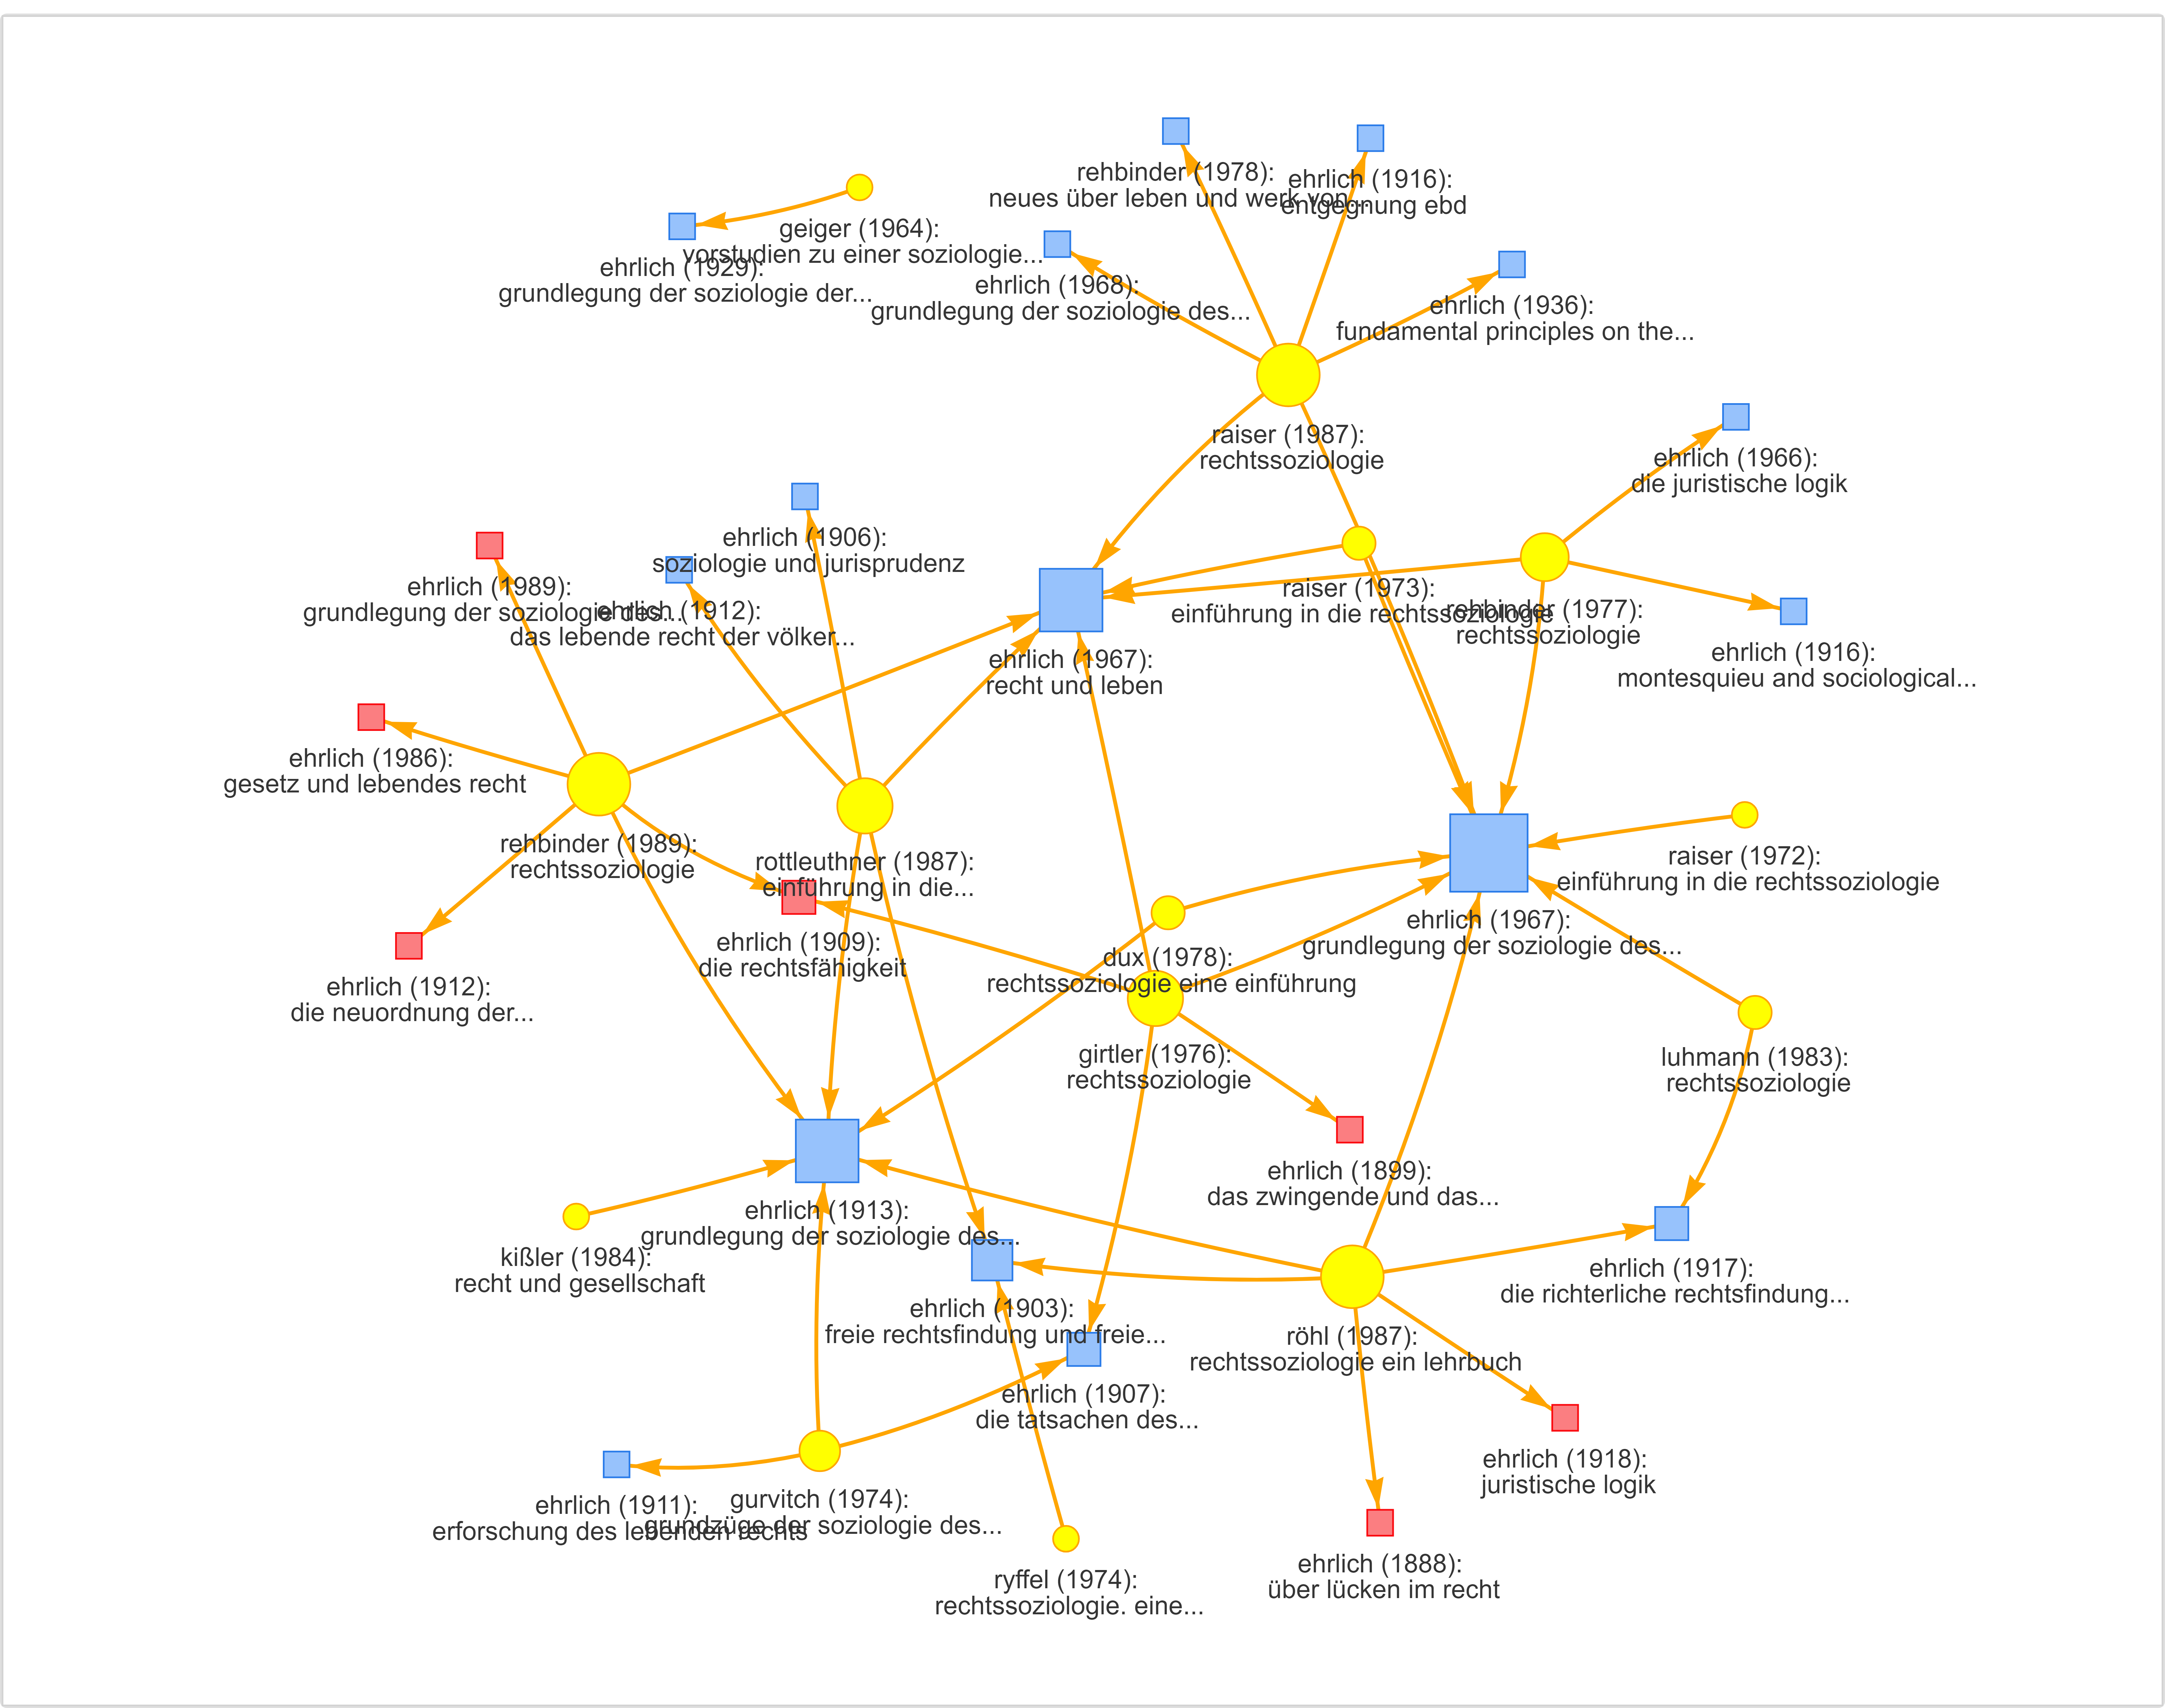

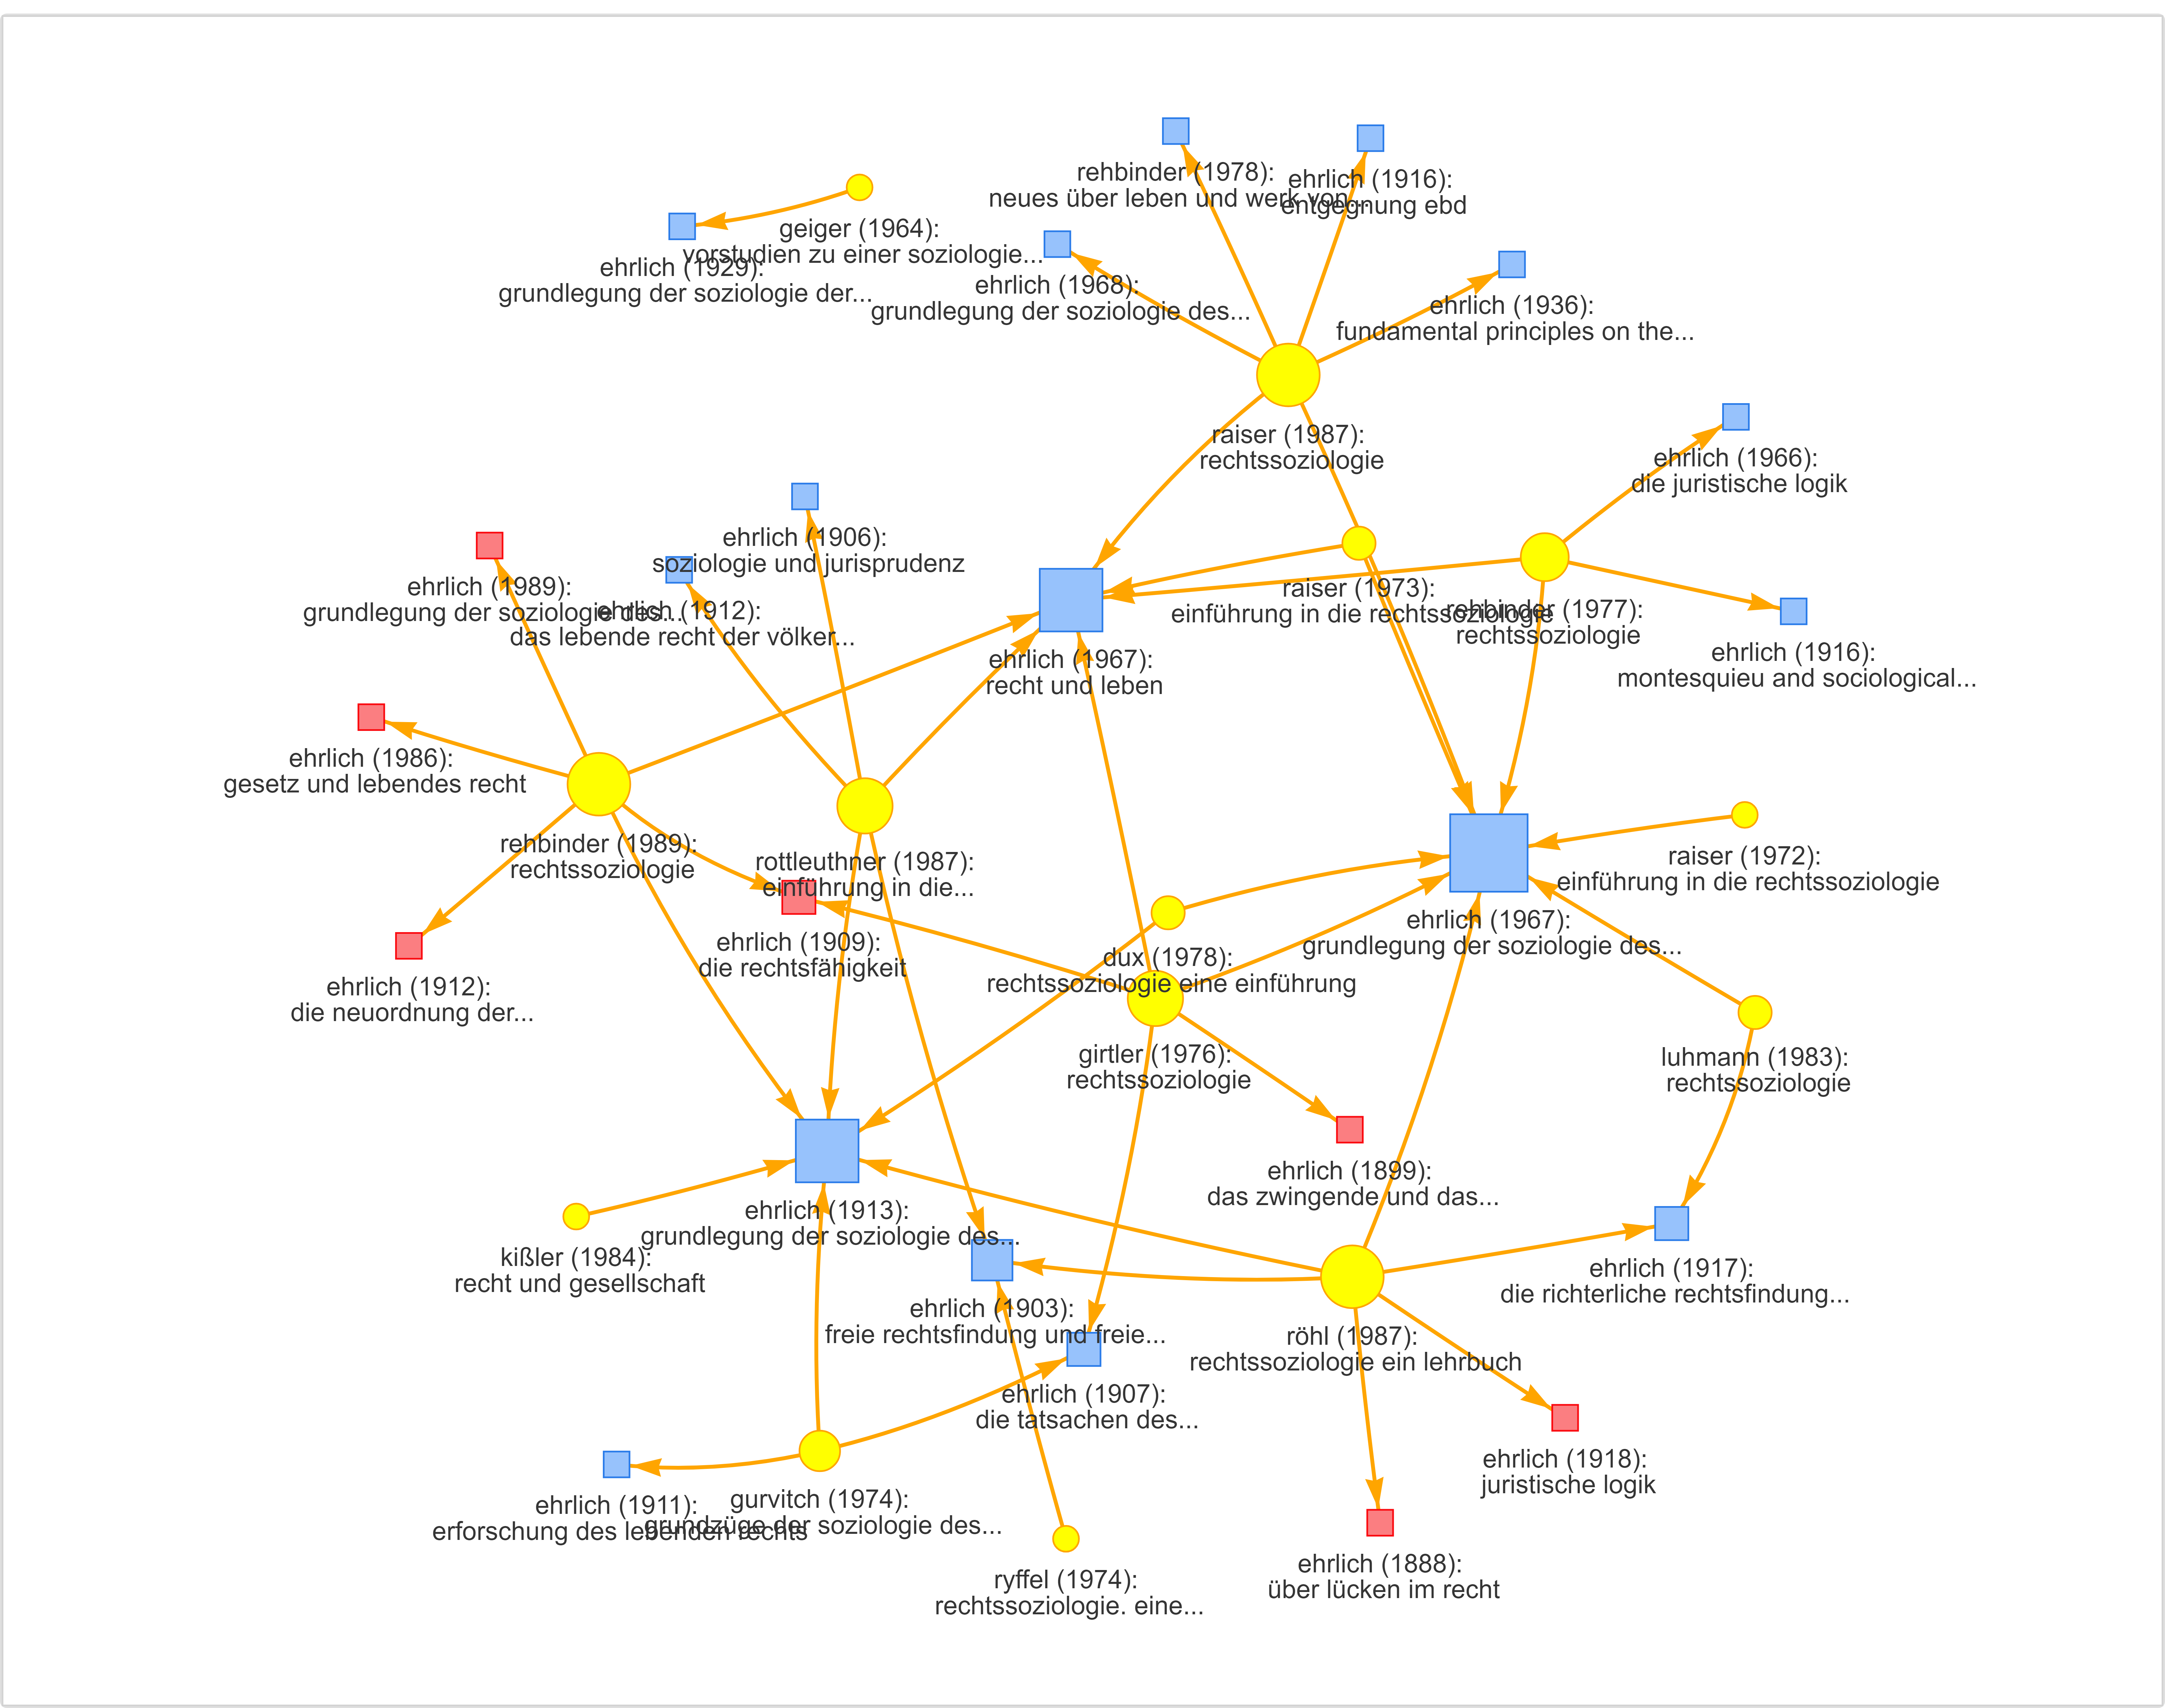

In [2]:
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
# The first query constructs the graph and scales the node size according to
# he number of incoming and outgoing citations
query1 = """
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
OPTIONAL MATCH (w2:Work)-[r2:CITES]->(w1)
CALL {
    WITH w1
    MATCH (w1)<-[c:CITES]-(:Work)
    WITH w1, count(c) AS citationCount
    SET w1.vis_shape = "square"
    SET w1.vis_group = "cited"
    SET w1.vis_value = citationCount
}
WITH w2, collect(r2) AS r2s
CALL {
    WITH w2, r2s
    WITH w2, size(r2s) AS r2Count
    SET w2.vis_group = "citing"
    SET w2.vis_value = r2Count
}
unwind r2s as r2
with w2, r2
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
RETURN w1, w2, r2
"""
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query1, height="1000px", seed=9)
draw_network(net,file="docs/13-rsoz-lehrbuecher-ehrlich-citation-network.html", screenshot=True)
cleanup(graph) # removes style properties added above


Hypothese: die Zitierung eines Werks von Ehrlich (w1) in einem Werk der Sekundärliteratur (w2) hat Auswirkung auf die Zitierung von (w1) in der (w2) zitierenden Literatur

In [ ]:
query="""
MATCH (a:Author)-[:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
SET w1.vis_shape = "square"
WITH w1, w2, r2
CALL {
  WITH w1, w2, r2
  OPTIONAL MATCH (w3:Work)-[r3:CITES]->(w2)
  OPTIONAL MATCH (w3)-[r4:CITES]->(w1)
  SET r2.vis_width = CASE
                     WHEN r3 IS NOT NULL AND r4 IS NOT NULL
                     THEN 6
                     ELSE 3
                   END
  WITH r3, r4
  RETURN r3, r4
}
WITH w1, w2, r2, r3, r4
// styling
SET w1.vis_group = "cited"
SET r3.vis_dashes = true
RETURN w1, w2, r2, r3, r4

"""
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query, height="800px", seed=1)
draw_network(net,file="docs/14-rsoz-lehrbuecher-ehrlich-indirect-citations.html", screenshot=True)
cleanup(graph)

In [ ]:
query="""
MATCH (a:Author)-[:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
SET w1.vis_shape = "square"
SET w1.vis_group = "cited"
WITH w1, r2, w2
OPTIONAL MATCH (w3:Work)-[r3:CITES]->(w2)
OPTIONAL MATCH (w3)-[r4:CITES]->(w1)
WITH w1, w2, w3, r2, r3, r4
CALL {
  WITH w1, w2
  MATCH (w3:Work)-[:CITES]->(w2), (w3)-[:CITES]->(w1)
  RETURN count(DISTINCT w3) as indirectCitationCount
}
WITH w1, w2, w3, r2, r3, r4, indirectCitationCount
SET r2.vis_value = indirectCitationCount
SET r3.vis_dashes = true
RETURN *

"""
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query, height="800px", seed=1)
draw_network(net,file="docs/14-rsoz-lehrbuecher-ehrlich-indirect-citations.html", screenshot=True)
cleanup(graph)

### ZfRsoz

In [ ]:
query4 = """
MATCH p1=(a:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CITES]-(w3:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
call {
    with w1
    SET w1.group = 'ehrlich'
}
RETURN p1
"""
from scripts.pyvis import create_or_update_network, draw_network
from scripts.utils import get_graph
graph = get_graph("zfrsoz")
net = create_or_update_network(graph, query4, height="800px")
draw_network(net,file="docs/ehrlich-zfrsoz-network.html", link_only=True)

### JLS

In [ ]:
query5 = """
MATCH p1=(a:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CITES]-(w3:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
call {
    with w1
    SET w1.group = 'ehrlich'
}
RETURN p1
"""
from scripts.pyvis import create_or_update_network, draw_network
from scripts.utils import get_graph
graph = get_graph("jls")
net = create_or_update_network(graph, query5, height="800px")
draw_network(net,file="docs/ehrlich-jls-network.html", link_only=True)
